In [ ]:
# Users can get to their stored data by using Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# PySpark is part of the official Spark releases that can be downloaded from the Apache Spark official site. For people who use Python, PySpark also lets them install pip from PyPI. Most of the time, this is used locally or by a client to communicate to a group instead of creating a cluster. 
pip install pyspark

In [ ]:
# importing the pyspark library.
import pyspark
# # Matplotlib is just a charting toolkit that Python programmers can use to create interactive visualizations, as well as static visualizations with visual effects.
import matplotlib.pyplot as plott
# The Seaborn package is available for users of Python who are interested in creating statistical graphics. It does this by extending the capabilities for matplotlib and by combining closely with the datatypes that pandas provides. Seaborn makes it simpler for you to learn about the data you're working with.
import seaborn as snsn
# # NumPy is a Python library that anybody may use and that is utilized in practically every engineering and research discipline. Its name stands for "Numerical Computer language," and its use is open to anyone.
import numpy as npp
# # bringing in a method that assists with data splitting for both training and testing through the train testing split operation.
from sklearn.model_selection import train_test_split 
# import the somte techinque from over sampling.
from imblearn.over_sampling import SMOTE
# import the mean square error from metrics.
from sklearn.metrics import mean_squared_error as MS
# import metrics from scikit learn package. 
import sklearn.metrics as metrics
# # Pandas is a free and open-source Python program that finds its most common application in fields such as data science and data processing. It is also utilized for machine learning.
import pandas as pdd
# importint the standard caler method from scikit learn package.
from sklearn.preprocessing import StandardScaler
#importing the adaboost algorithm from scikit learn.
from sklearn.ensemble import AdaBoostClassifier
# # Importing several of the modulus sklearn's most crucial parameters into the main program.
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
#importing the gradient boosting algorithm from sk_learn.
from sklearn.ensemble import GradientBoostingClassifier
#importing the voting algorithm from sk_learn.
from sklearn.ensemble import VotingClassifier 

# Read data  using Spark library 

In [ ]:
# importing the spark-session from sql.
from pyspark.sql import SparkSession 
# define classifier for spark-session.
sesion_spark = SparkSession.builder.appName("ReadCSV").getOrCreate() 

In [ ]:
df = sesion_spark.read.csv("/content/drive/MyDrive/shiv/IZU/creditcard.csv", header=True, inferSchema=True)
creditcard_df = df.toPandas()
creditcard_df.head()# showing strating 5 rows of data. 

In [ ]:
creditcard_df.info() # Showing  dataset information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard_df.describe() # Describe dataset 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
creditcard_df.isnull().sum() #Check null values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#Plotting heatmap

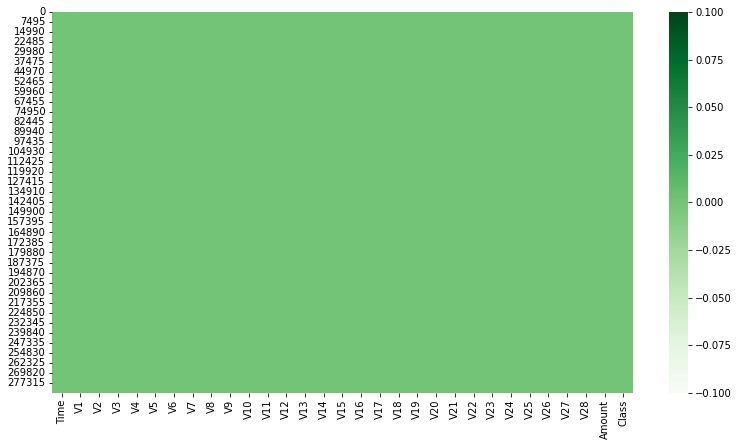

In [ ]:
plott.figure(figsize=(13, 7))  # we define fig size for heatmap.
snsn.heatmap(creditcard_df.isnull(),cmap = 'Greens')
plott.show() # it is used to show the graph. 

#Plotting correlation matrix 

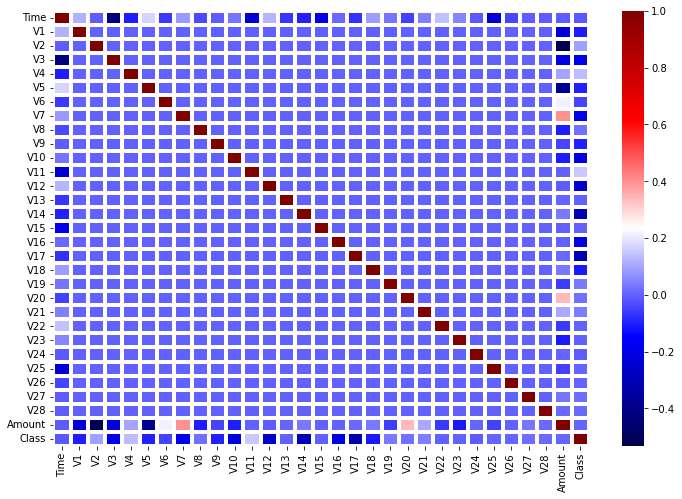

In [ ]:
plott.figure(figsize=[12,8])# we define figure size for heatmap.
snsn.heatmap(data=creditcard_df.corr(),cmap='seismic',linewidths=4);

# we are making scatter plot graph for some columns and set all the parameter  like x and y axis etc.

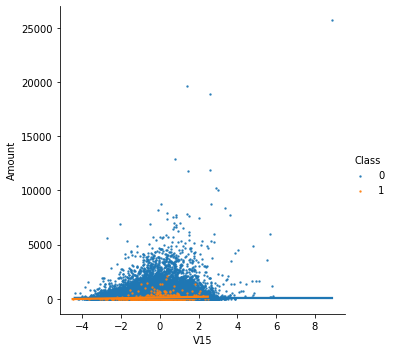

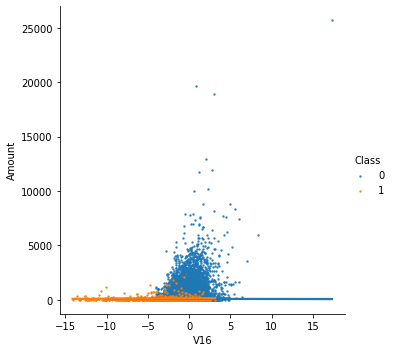

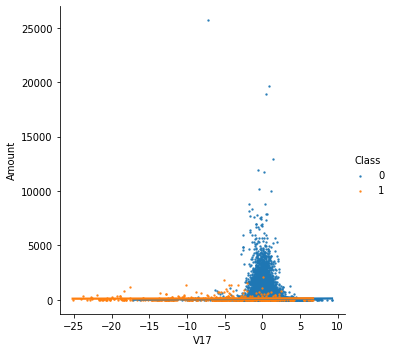

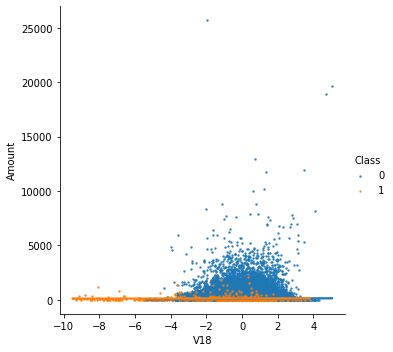

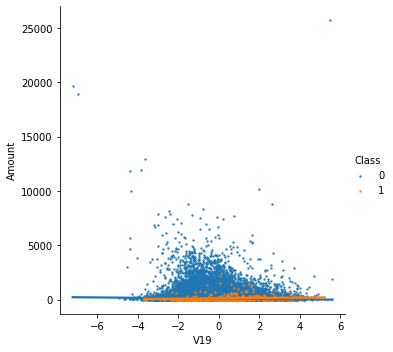

In [ ]:
# we are making scatter plot graph for some columns and set all the paramter like x and y axis etc.
# set the parameter for v15 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V15', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v16 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V16', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v17 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V17', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v18 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V18', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v19 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V19', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plott.show()  # it is used to show the graph.

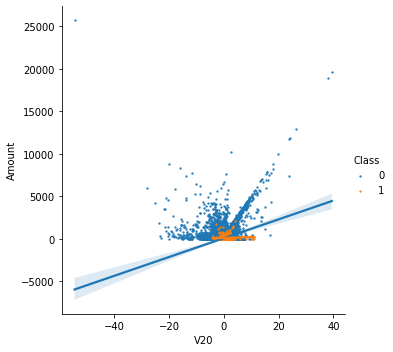

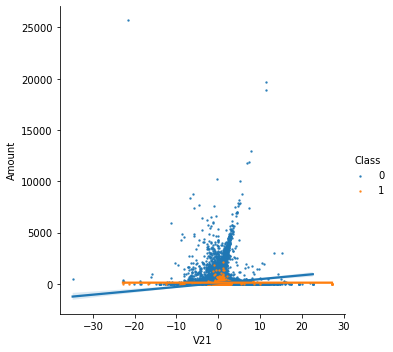

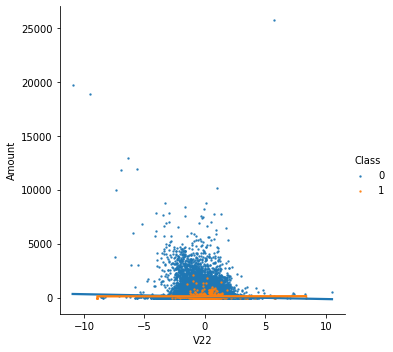

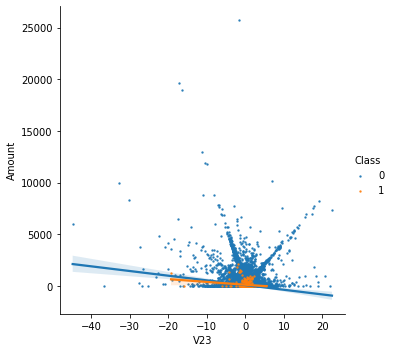

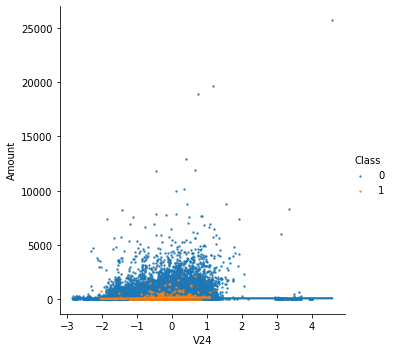

In [ ]:
'''A scatter plot may be drawn onto a FacetGrid with the help of the lmplot() function. Parameters: The following parameters,
 which are explained in more detail below, may be accepted by this method: x, y: (not required) These arguments are the names of the columns in the dat file.'''
 # set the parameter for v20 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V20', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v21 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V21', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v22 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V22', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v23 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V23', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v24 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V24', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plott.show() 

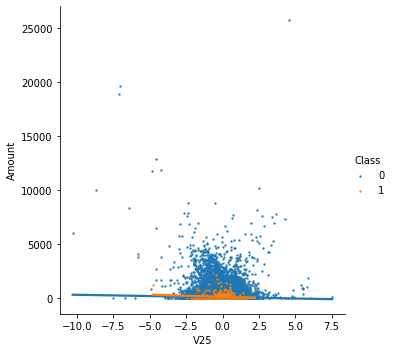

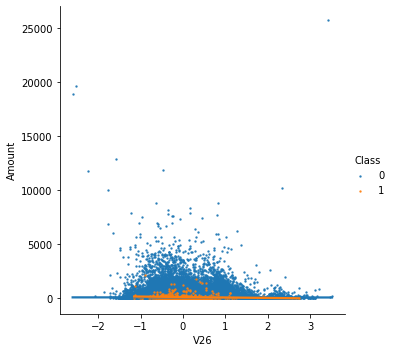

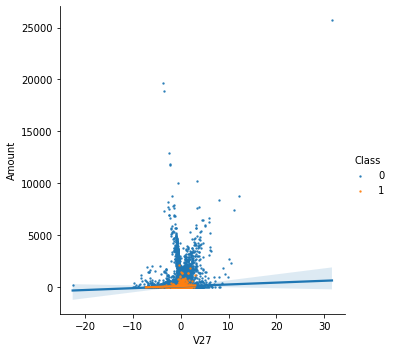

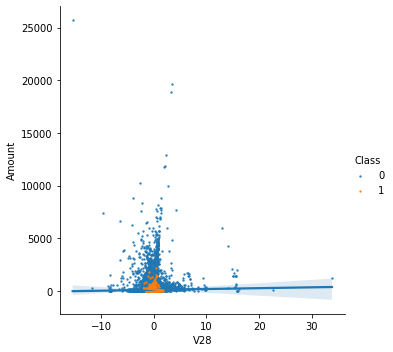

In [ ]:
# we are making scatter plot graph for some columns and set all the paramter like x and y axis etc.
# set the parameter for v25 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V25', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v26 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V26', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v27 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V27', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
# set the parameter for v28 column of dataset to plot scatter graph.
s_plot = snsn.lmplot(x='V28', y='Amount',data=creditcard_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plott.show()

*** Define independent(x) and dependent(y) variable ***

In [ ]:
X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df['Class']

In [ ]:
X.shape# check shape of x data.

(284807, 30)

In [ ]:
y.shape # check shape of y data.

(284807,)

#Plotting count plot for labels 

<Axes: xlabel='Class', ylabel='count'>

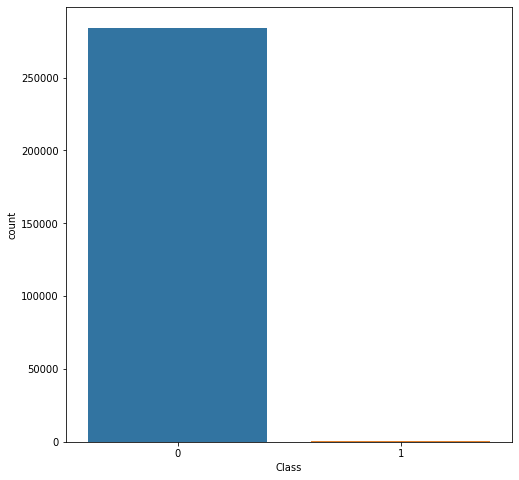

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# set figure size for graph.
plott.figure(figsize=[8,8])
# ploting the countplot graph.
snsn.countplot(data = creditcard_df.reset_index(), x = y);

#SelectKBest

<Axes: >

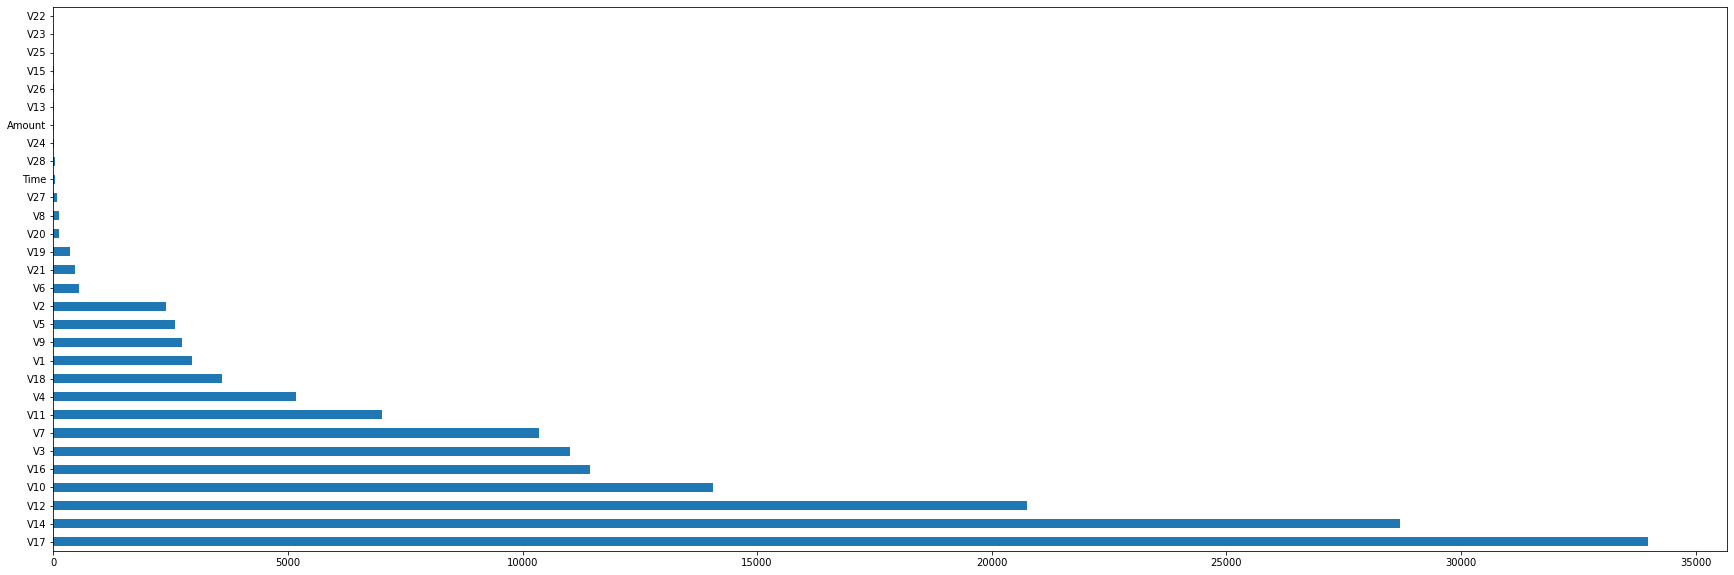

In [ ]:
# importing the kbest technique from sklearn.
from sklearn.feature_selection import SelectKBest
# define classifeir for kbest technique.
bt_features = SelectKBest()
# classifier fit with data.
kbest = bt_features.fit_transform(X,y)
fig,ax = plott.subplots() 
#set figure size 
fig.set_size_inches(30,10) 
# taking the data into spanda series.
feat_importances = pdd.Series(bt_features.scores_, index=X.columns)
# showing the graph for importance of data.
feat_importances.nlargest(30).plot(kind='barh') 

In [ ]:
X=X.drop(["V23", "V22"], axis=1)# drop column from data.

#SMOTE

<Axes: xlabel='Class', ylabel='count'>

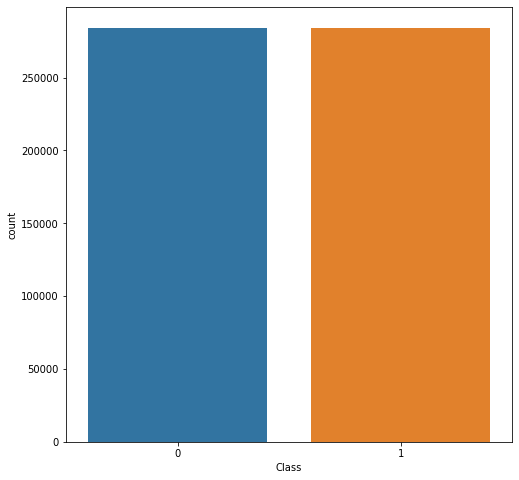

In [ ]:
# data balance using smote. 
X, y = SMOTE().fit_resample(X,y)
# set the figure size for graph.
plott.figure(figsize=[8,8])
# plot the countplot graph.
snsn.countplot(data = creditcard_df.reset_index(), x = y);

#StandardScaler

In [ ]:
# define classifier for scalling.
scaler = StandardScaler()
# fit classifier with data.
scaler.fit(X)
scaler_X = scaler.transform(X)

## Divide data training & testing  train 80 & test 20 % 

In [ ]:
tained_x , tst_x, tained_y, tst_y = train_test_split(scaler_X, y, test_size = 0.2, random_state=0) 

In [ ]:
tained_x.shape, tst_x.shape # print the shape of data 

((454904, 28), (113726, 28))

In [ ]:
tained_y.shape, tst_y.shape # print the shape of data

((454904,), (113726,))

#AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier()
clf.fit(tained_x, tained_y) 
ypred= clf.predict(tained_x) 
#printing accuracy score 
print("Training Accuracy_score  : %.3f" %(accuracy_score(tained_y,ypred)))
#printing Precision score 
print("Training Precision_score  : %.3f" %(precision_score(tained_y,ypred)))
#printing Recall score 
print("Training Recall_score : %.3f" %(recall_score(tained_y,ypred)))
#printing F1 score 
print("Training F1_score  : %.3f" %(f1_score(tained_y,ypred))) 

Training Accuracy_score  : 0.980
Training Precision_score  : 0.986
Training Recall_score : 0.973
Training F1_score  : 0.979


#Printing sensitivity and Specificity for training data

In [ ]:
cmatrix1 = confusion_matrix(tained_y,ypred)
# Showing Sensitivity accuracy 
Sensitivity = cmatrix1[0,0]/(cmatrix1[0,0]+cmatrix1[0,1])
# Showing Specificity accuracy 
Specificity = cmatrix1[1,1]/(cmatrix1[0,1]+cmatrix1[1,1]) 

In [ ]:
print('Sensitivity : ', Sensitivity)
print('Specificity : ', Specificity)

Sensitivity :  0.9862208962568818
Specificity :  0.9860174781523097


#Classification_report for Training data

In [ ]:
print(classification_report(tained_y,ypred)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227591
           1       0.99      0.97      0.98    227313

    accuracy                           0.98    454904
   macro avg       0.98      0.98      0.98    454904
weighted avg       0.98      0.98      0.98    454904



# MSE for Train data

In [ ]:
mse = metrics.mean_squared_error(tained_y,ypred) 
print("MSE:",mse) # printing mse 

MSE: 0.020454865202328403


#CONFUSION MATRIX FOR TRAIN DATA

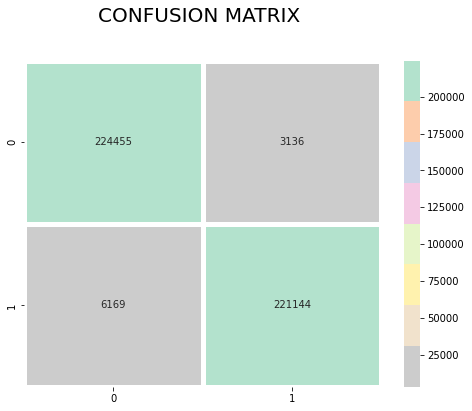

In [ ]:
# plotting confusion matrix for model.
# set figure size for graph. 
plott.figure(figsize=[8,6])
cm= confusion_matrix(tained_y, ypred)
# pass the parameter to plot the matrix.
snsn.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5)
# set title for matrix.
plott.title("CONFUSION MATRIX ", y=1.1, fontsize=20)
plott.show() 

#PRINTING TESTING RESULTS

In [ ]:
ypred1= clf.predict(tst_x) 
#printing accuracy score 
print("Testing Accuracy_score  : %.3f" %(accuracy_score(tst_y,ypred1)))
#printing Precision score 
print("Testing Precision_score  : %.3f" %(precision_score(tst_y,ypred1)))
#printing Recall score 
print("Testing Recall_score : %.3f" %(recall_score(tst_y,ypred1)))
#printing F1 score 
print("Testing F1_score  : %.3f" %(f1_score(tst_y,ypred1))) 

Testing Accuracy_score  : 0.979
Testing Precision_score  : 0.986
Testing Recall_score : 0.973
Testing F1_score  : 0.979


#Printing sensitivity and Specificity for testing  data

In [ ]:
cmatrix1 = confusion_matrix(tst_y,ypred1)
# Showing Sensitivity accuracy 
Sensitivity = cmatrix1[0,0]/(cmatrix1[0,0]+cmatrix1[0,1])
# Showing Specificity accuracy 
Specificity = cmatrix1[1,1]/(cmatrix1[0,1]+cmatrix1[1,1]) 

In [ ]:
print('Sensitivity : ', Sensitivity)
print('Specificity : ', Specificity)

Sensitivity :  0.9859495099076229
Specificity :  0.9858306073104821


# Classification_report for Test data

In [ ]:
print(classification_report(tst_y,ypred1)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56724
           1       0.99      0.97      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



#MSE for test data

In [ ]:
mse = metrics.mean_squared_error(tst_y,ypred1) 
print("MSE:",mse) # printing mse 

MSE: 0.02064611434500466


#CONFUSION MATRIX

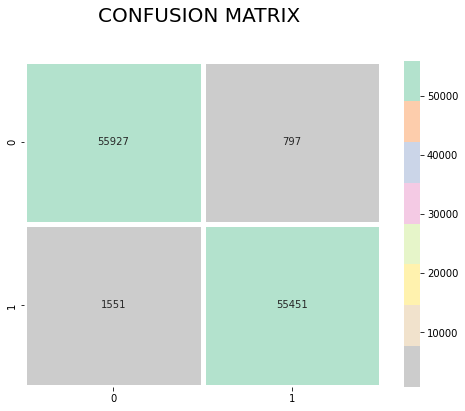

In [ ]:
# plotting confusion matrix for model.
# set figure size for matrix 
plott.figure(figsize=[8,6])
cm= confusion_matrix(tst_y,ypred1)
# pass all parameter to plot the graph.
snsn.heatmap(cm, annot=True,cmap="Pastel2_r",fmt='g',linewidths=5)
# set the title for matrix.
plott.title("CONFUSION MATRIX ", y=1.1, fontsize=20)
plott.show()

In [ ]:
pip install catboost

In [ ]:
# importing the algorithm and define the classifier for model.
from catboost import CatBoostClassifier
catb= CatBoostClassifier()
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=5, random_state=0)

#Voting Classifier

In [ ]:
clf = VotingClassifier(estimators= [('gbc',gbc),('catb',catb)], voting='hard').fit(tained_x, tained_y)
y_pred= clf.predict(tained_x) 

#RESULTS FOR TRAIN DATA

In [ ]:
#printing accuracy score 
print("Training Accuracy_score  : %.3f" %(accuracy_score(tained_y,y_pred)))
#printing Precision score 
print("Training Precision_score  : %.3f" %(precision_score(tained_y,y_pred)))
#printing Recall score 
print("Training Recall_score : %.3f" %(recall_score(tained_y,y_pred)))
#printing F1 score 
print("Training F1_score  : %.3f" %(f1_score(tained_y,y_pred)))

Training Accuracy_score  : 0.999
Training Precision_score  : 1.000
Training Recall_score : 0.998
Training F1_score  : 0.999


#Printing Sensitivity, Specificity for train data 

In [ ]:
cmatrix1 = confusion_matrix(tained_y,y_pred)
# Showing Sensitivity accuracy 
Sensitivity = cmatrix1[0,0]/(cmatrix1[0,0]+cmatrix1[0,1])
# Showing Specificity accuracy 
Specificity = cmatrix1[1,1]/(cmatrix1[0,1]+cmatrix1[1,1])

In [ ]:
print('Sensitivity : ', Sensitivity)
print('Specificity : ', Specificity)

Sensitivity :  0.9998550030537235
Specificity :  0.9998545371194824


#classification_report for train data 

In [ ]:
print(classification_report(tained_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227591
           1       1.00      1.00      1.00    227313

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



#mse for train data 

In [ ]:
mse = metrics.mean_squared_error(tained_y,y_pred) 
print("MSE:",mse) # printing mse 

MSE: 0.0011365035260186764


#Confusion_matrix for train data 

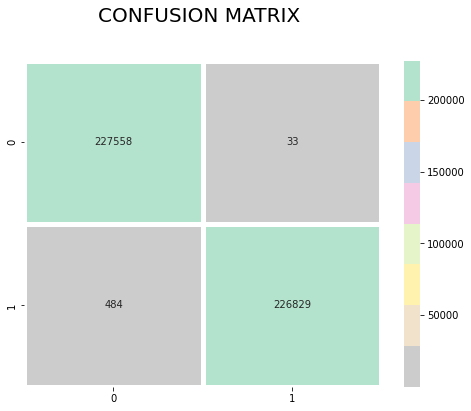

In [ ]:
# plotting confusion matrix for model.
# set figure size for matrix
plott.figure(figsize=[8,6])
cm= confusion_matrix(tained_y,y_pred)
# passing parameter to plot the matrix.
snsn.heatmap(cm, annot=True,cmap="Pastel2_r",fmt='g',linewidths=5,)
# set title for matrix.
plott.title("CONFUSION MATRIX ",y=1.1, fontsize=20)
plott.show() 

#RESULTS FOR TEST DATA

In [ ]:
y_pred1= clf.predict(tst_x) 
#printing accuracy score 
print("Testing Accuracy_score  : %.3f" %(accuracy_score(tst_y,y_pred1)))
#printing Precision score 
print("Testing Precision_score  : %.3f" %(precision_score(tst_y,y_pred1)))
#printing Recall score 
print("Testing Recall_score : %.3f" %(recall_score(tst_y,y_pred1)))
#printing F1 score 
print("Testing F1_score  : %.3f" %(f1_score(tst_y,y_pred1))) 

Testing Accuracy_score  : 0.999
Testing Precision_score  : 1.000
Testing Recall_score : 0.998
Testing F1_score  : 0.999


#Printing Sensitivity, Specificity for test data

In [ ]:
cmatrix1 = confusion_matrix(tst_x,y_pred1)
# Showing Sensitivity accuracy 
Sensitivity = cmatrix1[0,0]/(cmatrix1[0,0]+cmatrix1[0,1])
# Showing Specificity accuracy 
Specificity = cmatrix1[1,1]/(cmatrix1[0,1]+cmatrix1[1,1]) 

In [ ]:
print('Sensitivity : ', Sensitivity)
print('Specificity : ', Specificity)

Sensitivity :  0.9995240110006347
Specificity :  0.9995254165787808


#Classification_report for test data

In [ ]:
print(classification_report(tst_x,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



#mse for test data 

In [ ]:
mse = metrics.mean_squared_error(tst_x,y_pred1)
print("MSE:",mse) # printing mse 

MSE: 0.001442062501099133


#Confusion_matrix for test data 

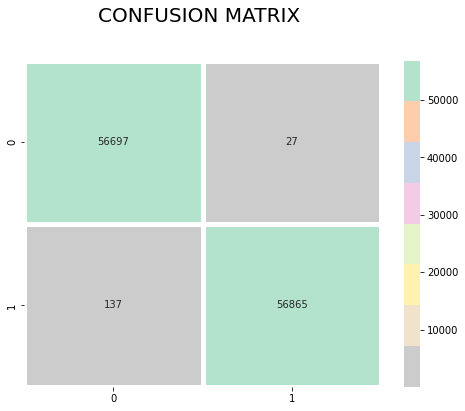

In [ ]:
# plotting confusion matrix for model.
# set figure size for matrix
plott.figure(figsize=[8,6])
cm= confusion_matrix(tst_x, y_pred1)
snsn.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5,)
# set title for matrix
plott.title("CONFUSION MATRIX ", y=1.1, fontsize=20)
plott.show() 